In [ ]:
from experiments.Scheduling.eval import Config, EmuWorld, EmuCloud, EmuDevice

from matplotlib import patches
import matplotlib.pyplot as plt
import numpy as np


def visualize(config: Config, world: EmuWorld):
    plt.figure(figsize=(15, 5))
    colors = {
        "Decode": [
            '#FFF2CC', '#E2F0D9'
        ],
        "TransDraft": '#DBE3F3',
        "TransTarget": '#e3b4b8'
    }
    draft_total = [0, 0]
    target_total = [0, 0]
    for record in world.records:
        if record.title == "DraftToken":
            draft_total[record.meta['src_id']] += 1
        elif record.title == "TargetToken":
            target_total[record.meta['src_id']] += 1
    center = [0, (draft_total[1] + target_total[1] + 1) * 0.1] 
    
    n_draft_token = [0, 0]
    n_target_token = [0, 0]
    for record in world.records:
        ax = plt.gca()
        if record.title.startswith("Decode"):
            ax.add_patch(patches.Rectangle(
                xy=(record.beg_time, center[record.meta['rank']]), width=record.duration, height=0.1, 
                edgecolor='black', facecolor=colors["Decode"][record.meta['rank']], linewidth=0.5, zorder=2))
        elif record.title == "DraftToken":
            n_draft_token[record.meta['src_id']] += 0.1
            ax.add_patch(patches.Rectangle(
                xy=(record.beg_time, center[record.meta['src_id']] - n_draft_token[record.meta['src_id']]), width=record.duration, height=0.1, 
                edgecolor='black', facecolor=colors["TransDraft"], linewidth=0.5, zorder=2))
        elif record.title == "TargetToken":
            n_target_token[record.meta['src_id']] += 0.1
            ax.add_patch(patches.Rectangle(
                xy=(record.beg_time, center[record.meta['src_id']] - draft_total[record.meta['src_id']] * 0.1 - n_target_token[record.meta['src_id']]), width=record.duration, height=0.1, 
                edgecolor='black', facecolor=colors["TransTarget"], linewidth=0.5, zorder=2))
    plt.xlabel('Time (s)')
    plt.ylim(center[0] - (draft_total[0] + target_total[0]) * 0.1, center[1] + 0.1)
    plt.xlim(0, world.wall_time)
    plt.xticks(np.arange(0, world.wall_time, 0.5))
    plt.yticks([center[0] + 0.05, center[1] + 0.05], ['Cloud/Decode', 'Device/Decode'])
    plt.title(config.method)
    plt.grid(zorder=1, alpha=0.5)
    plt.show()

In [7]:
config = Config()
config.max_draft_tokens = 10
config.max_new_tokens = 99
world = EmuWorld(precision=1e-3)
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)
print(world.entities[0].target_tokens)
print(world.entities[1].target_tokens)
print(world.wall_time)

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294]
[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294]
28.02800000001127


In [8]:
config = Config()
config.method = "synchronized"
config.max_draft_tokens = 10
config.max_new_tokens = 99
world = EmuWorld(precision=1e-3)
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)
print(world.entities[0].target_tokens)
print(world.entities[1].target_tokens)
# visualize(config, world)
print(world.wall_time)

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207]
[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207]
100.00000000011343


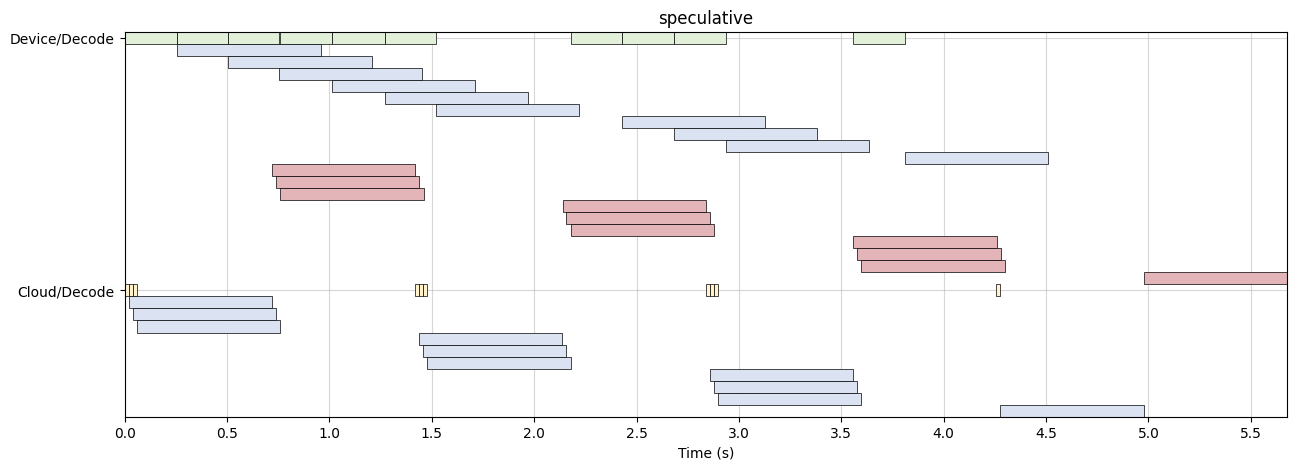

In [9]:
config = Config()
config.max_draft_tokens = 3
config.max_new_tokens = 10
world = EmuWorld(precision=1e-3)
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)
visualize(config, world)

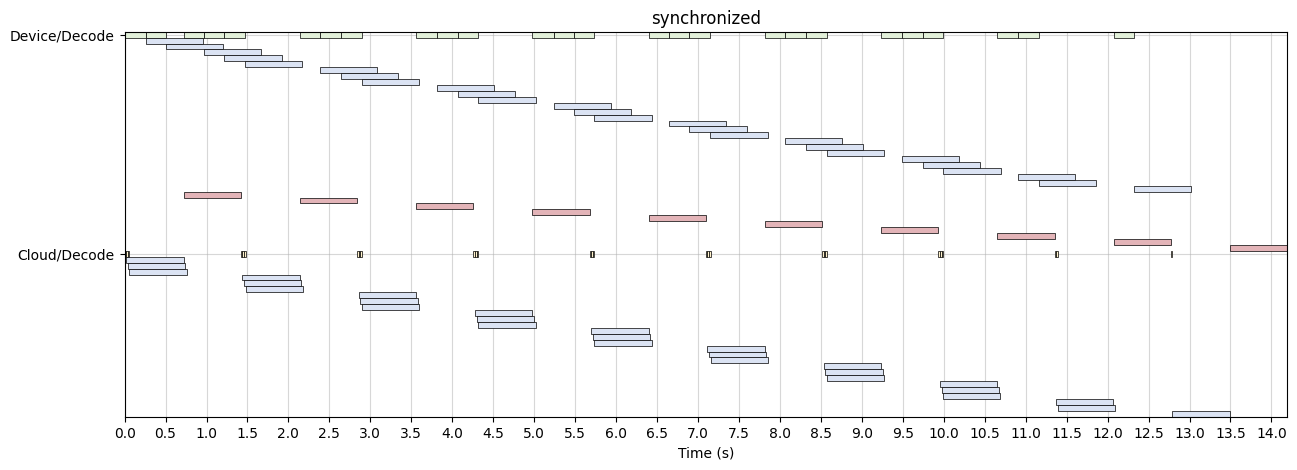

In [10]:
config = Config()
config.method = "synchronized"
config.max_draft_tokens = 3
config.max_new_tokens = 10
world = EmuWorld(precision=1e-3)
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)
visualize(config, world)